#Justin
# Introduction
We have started this page in an attempt to give users guidance on how to read ACOS data in python. We prepared relatively simple examples. To remind, ACOS data are in HDF5 format.

The emphasis  here as given on reading and quality screening is done on purpose. These steps are the most important to understand by novice users. Once they become confident in opening files and reading data from there, they can augment examples here with the particular usage they have in mind.

# Import Dependencies

Let's import all the libraries we need. This needs to be done before any of the other cells can be run. These libraries were installed in the docker container you are using, so we will not need to worry about installing anything. Simply running the following cell takes care of all of the dependencies.

In [ ]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from numpy.ma import masked_array
%matplotlib inline
import os
import glob
import getpass

# Importing the Data
First, we need to get all the names of the URLs we will be downloading from.

## Downloading the Data

We will be downloading data from the [GESDISC data archive](https://oco2.gesdisc.eosdis.nasa.gov). You can feel free to explore the data available there. We will be downloading data from March, 2010. If you navigate to `GOSAT_TANSO_Level2/ACOS_L2S.7.3/2010` folder, you will see 365 folders to view (and download) the data from all of 2010. If you click on `/060`, you will see all the files from the 60th day of 2010 (March 1st). As you can see, there are a lot of files from each day. To make it easier to download all this data (instead of manually clicking on each of the links on each of the 31 days) we will use `wget` to download everything in one simple command.

We can use `wget` to download the names of the `.h5` files. This command will go to each of these URLs and download any files linked on that webpage ending in `.h5`. Before we can downlaod anything, let's create this URL file.

### Creating URL file
We first need to create a URL file with the URLs of all the files we want to download. We will write this out to `URLs.txt` in the `ACOS_DATA_HANDLING` folder. We can use python to do this. Before creating the URL file, run the following in your terminal.

> `cd /home/condauser/tutorials/notebooks/ACOS_DATA_HANDLING`

> `ls`

As you can see, there is no URL file, just the jupyter notebook you are currently looking at. Looking at the folder naming scheme on the data link [here](https://oco2.gesdisc.eosdis.nasa.gov/data/GOSAT_TANSO_Level2/ACOS_L2S.7.3/2010/), you see that the URLs are named nicely, so we can just use a script to create our URL file.

Now run the following cell here in Jupyter.

In [2]:
os.chdir("/home/condauser/tutorials/notebooks/ACOS_DATA_HANDLING")
URLs = []

# dates corresponding to March 1 - 31, 2010
start = 60
end = 90
for i in range(start, end + 1):
    URLs.append("https://oco2.gesdisc.eosdis.nasa.gov/data/GOSAT_TANSO_Level2/ACOS_L2S.7.3/2010/0{}/".format(
        str(i).zfill(2)))
open("URLs.txt", "w").write("\n".join(URLs))

2603

The above code creates a list of the URLs we are interested in getting data from. This is stored in `URLs.txt` in our current directory. Run `ls` again in your terminal and you will see that there is now a file called `URLs.txt`. You can inspect this file by running the following in your terminal.

> `cd /home/condauser/tutorials/notebooks/ACOS_DATA_HANDLING`

> `nano URLs.txt`

As you can see, there are 31 URLs in this file, one per line. To exit this text editor, press `CTRL+X`. Now that we have the URLs we want to get the files from, we can proceed to the downloading step.

## Download Data

Let's create a folder to store all the new data. Before doing this, let's see what's in our `ACOS_DATA_HANDLING` folder. Run the following in your terminal to do this.

> `cd /home/condauser/tutorials/notebooks/ACOS_DATA_HANDLING`

> `ls`

As of now, only the jupyter notebook and the `URLs.txt` file are in this folder. Now, let's create the new folder.

> `cd /home/condauser/tutorials/notebooks/ACOS_DATA_HANDLING`

> `mkdir ACOS_DATA`

Now, run `ls` again in your terminal. As you can see, we successfully created a folder called `ACOS_DATA`. Let's check that this folder is empty. Run the following in your terminal.

> `cd /home/condauser/tutorials/notebooks/ACOS_DATA_HANDLING/ACOS_DATA`

> `ls`

So you can see that this notebook is empty. Next, we will run a `wget` command to download all the data. Note that this command will take several minutes to run. **Make sure you include the single quotes around your username and password**

> `cd /home/condauser/tutorials/notebooks/ACOS_DATA_HANDLING/ACOS_DATA`

> `wget --user='<username>' --password='<password>' -r -c -nH -nd -np -A h5 -i ../URLs.txt`

When this command finishes, you should see your command prompt (`condauser:/ACOS_DATA_HANDLING $`) at the bottom of your terminal. After this finishes, run the following command.

> `history -c`

The `history` command clears your command line history so your username and passwords are not stored there. After this command has finished (you will see the terminal prompt again), let's confirm that these files have downloaded. We can do this by running the following commands in your terminal.

> `cd /home/condauser/tutorials/notebooks/ACOS_DATA_HANDLING/ACOS_DATA`

> `ls -U | head -10`

The second command here returns the first 10 items in this directory, without sorting them (it makes the command faster). From this, you will see that our download has been successful, and this folder now has the data we are interested in. Now, let's import this data into python.

## Import Data

We need to import all this data into this python environment, but first we need all the names of the files we just imported. We can use the `glob` package to find these names.

### Getting File Names

The `glob` function within the `glob` package gives all the names with the specified extension. First, make sure the current directory is `acos_data` (to see your current directory, you can run `os.getcwd()` in python).

In [3]:
os.chdir("/home/condauser/tutorials/notebooks/ACOS_DATA_HANDLING/ACOS_DATA")
filenames = glob.glob("/home/condauser/tutorials/notebooks/ACOS_DATA_HANDLING/ACOS_DATA/*.h5")
len(filenames)

455

So we have successfully downloaded 455 `.h5` datasets!
### File Contents

Next, we need to import all the data from each of these files. Since we will be averageing across time, we do not need to worry about storing the data by time; we can simply put all the data in one place. When importing these datasets, the data is stored within "groups" and within each group is a series of variables. Let's import one dataset and look at all the groups and variables.

In [4]:
data = netCDF4.Dataset(filenames[0])
for grp in data.groups:
    print(grp)
    print("-" * 40)
    for var in data.groups[grp].variables:
        print(var)
    print("\n")

ABandCloudScreen
----------------------------------------
albedo_o2_cld
dispersion_multiplier_cld
noise_o2_cld
reduced_chi_squared_o2_cld
reduced_chi_squared_o2_threshold_cld
signal_o2_cld
snr_o2_cld
surface_pressure_apriori_cld
surface_pressure_cld
surface_pressure_delta_cld
surface_pressure_offset_cld
temperature_offset_cld


Dimensions
----------------------------------------


IMAPDOASPreprocessing
----------------------------------------
ch4_column_apriori_idp
ch4_column_idp
ch4_column_uncert_idp
ch4_weak_band_processing_flag_idp
cloud_flag_idp
co2_column_apriori_idp
co2_column_ch4_window_idp
co2_column_strong_band_idp
co2_column_strong_band_uncert_idp
co2_column_weak_band_idp
co2_column_weak_band_uncert_idp
co2_ratio_idp
co2_strong_band_processing_flag_idp
co2_weak_band_processing_flag_idp
delta_d_idp
delta_d_uncert_idp
dry_air_column_apriori_idp
h2o_column_apriori_idp
h2o_column_idp
h2o_column_uncert_idp
h2o_ratio_idp
h2o_ratio_uncert_idp
hdo_column_apriori_idp
hdo_column_idp
hd

There are a huge number of groups and variables stored in this dataset. For this tutorial, we will be using the variable `xco2`, which is in `RetrievalResults` group. We will also need the variables `sounding_latitude` and `sounding_longitude` from the `SoundingGeometry` group. 

### Pulling the Files into Python

We can import each of these files in turn using the following function and script. Run the following cell. Note that it may take a minute.

In [5]:
def dataImport(infile):
    data = netCDF4.Dataset(infile)
    xco2_vals = data.groups["RetrievalResults"].variables["xco2"][:]
    lat_vals = data.groups["SoundingGeometry"].variables["sounding_latitude"][:]
    lon_vals = data.groups["SoundingGeometry"].variables["sounding_longitude"][:]
    return [xco2_vals, lat_vals, lon_vals]

xco2 = []
lat = []
lon = []
    
for file in filenames:
    out = dataImport(file)
    xco2.extend(out[0])
    lat.extend(out[1])
    lon.extend(out[2])

if len(xco2) == len(lat) == len(lon):
    print("successfully imported {} datapoints".format(len(xco2)))
else:
    print("something went wrong in importation...")

successfully imported 50485 datapoints


So now we have a little over 50,000 observations. Now, we need to get them into the correct format to plot with `Basemap`. 

# Formatting the Data

Currently, we have our data in triples of the form `(xco2, lat, lon)`, but we want our `xco2` data to be in a grid format, where each row corresponds to a value of latitude and each row corresponds to a value of longitude. But since  the latitude and longitude measurements given to us are fairly exact, we will round down our measurements of latitude and longitude to increments of 0.5. We will then average values of `xco2` within each value of latitude and longitude.

## Gridding our Data

In [6]:
def reduceDimension(data, lats, lons, squareSize):
    
    transLat = np.arange(-90,90 + squareSize,squareSize)
    transLon = np.arange(-180,180 + squareSize,squareSize)
    
    nLat = len(transLat)
    nLon = len(transLon)
    
    transData = [[[] for j in range(nLon)] for i in range(nLat)] #np.zeros((nLat,nLon))
    
    transMask = np.full((nLat,nLon),False)
    
    # reassign points
    for point,lat,lon in zip(data, lats, lons):
        roundLatIndex = int(lat / squareSize + 90 / squareSize) #% len(transLat)
        roundLonIndex = int(lon / squareSize + 180 / squareSize) #% len(transLon)
        if lat >= -90.0:
            transData[roundLatIndex][roundLonIndex].append(point)
        
    # could be multiple points per square, take mean
    for i,row in enumerate(transData):
        for j,square in enumerate(row):
            if not square:
                transData[i][j] = 0
                transMask[i][j] = True
            else:
                # convert to PPM
                transData[i][j] = 1000000 * np.mean(square)
                
    transDataMasked = masked_array(transData, transMask)
    
    return [transDataMasked, transLat, transLon]

[trans_xco2_masked, transLat, transLon] = reduceDimension(xco2, lat, lon, 0.5)

# Plotting Data

Now, onto the fun part. Since we have our data in the correct format, it is fairly easy to throw the information into `Basemap` to get a nice looking plot. The following function takes data, latitude and longitude and plots on a robinson projection.

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The shading option was deprecated in version 1.2. Use edgecolors instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


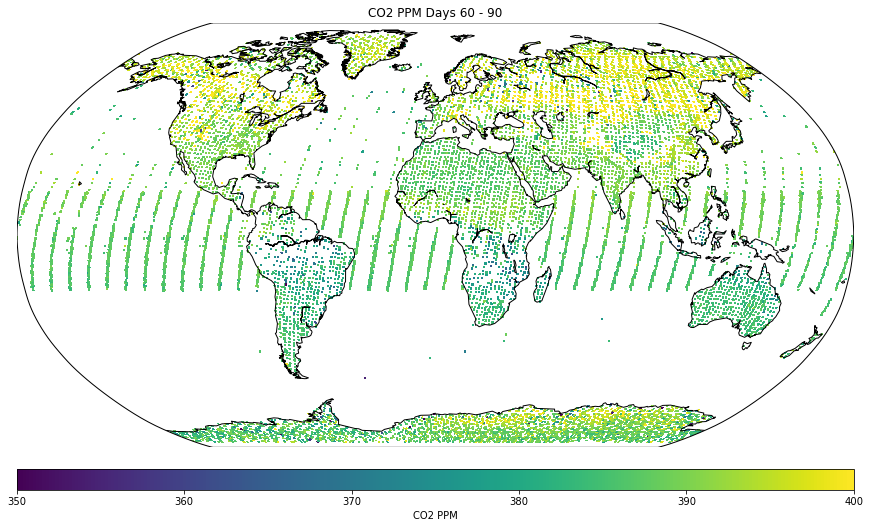

In [7]:
# data should be masked if necessary (it likely is necessary)
def plotWorld(data, lat, lon):
    [lons, lats] = np.meshgrid(lon, lat)
    plt.figure(figsize = (15,15))
    b = Basemap(projection="robin", lat_0=0, lon_0=0)
    b.drawcoastlines()
    cs = b.pcolor(lons,lats, data, shading='flat', vmin=350, vmax=400, latlon=True)
    cbar = b.colorbar(cs, location="bottom", pad="5%")
    cbar.set_label("CO2 PPM")
    plt.title("CO2 PPM Days {} - {}".format(start,end))

plotWorld(trans_xco2_masked, transLat, transLon)

So this is a simple way to download data using `wget`, import and format data using `netCDF4` and plot the data using `Basemap`.